# Clinical

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import gzip
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,precision_score,accuracy_score, recall_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing the dataset

cl = pd.read_csv('miller2005_public_miller2005_public_clinicalMatrix.gz', compression='gzip',delimiter="\t", header=0 )
cl.head()

,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,_INTEGRATION,_PATIENT,p53DLDAclassResult,p53mutant,_GENOMIC_ID_miller2005
0,X100B08,68,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR-,9.0,X100B08,X100B08,WT-like,p53-,X100B08
1,X101B88,40,No,AliveOrCensored,12.0,ER-,G3,LN-,PgR-,12.0,X101B88,X101B88,MT-like,p53+,X101B88
2,X102B06,51,No,AliveOrCensored,12.0,ER+,G3,LN-,PgR+,26.0,X102B06,X102B06,MT-like,p53+,X102B06
3,X103B41,52,Yes,NaN,NaN,ER-,G3,LN+,PgR-,22.0,X103B41,X103B41,MT-like,p53-,X103B41
4,X104B91,80,Yes,AliveOrCensored,4.0,ER+,G3,NaN,PgR+,24.0,X104B91,X104B91,WT-like,p53+,X104B91


In [3]:
# there are missing values 

cl = cl.dropna(axis=0)
cl = cl.drop(['_INTEGRATION', '_PATIENT', '_GENOMIC_ID_miller2005'], axis = 1)

cl

# 251 instances have dropped to 222

,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,p53DLDAclassResult,p53mutant
0,X100B08,68,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR-,9.0,WT-like,p53-
1,X101B88,40,No,AliveOrCensored,12.0,ER-,G3,LN-,PgR-,12.0,MT-like,p53+
2,X102B06,51,No,AliveOrCensored,12.0,ER+,G3,LN-,PgR+,26.0,MT-like,p53+
5,X105B13,46,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR+,13.0,WT-like,p53-
6,X106B55,37,No,DeathFromCancer,7.0,ER+,G1,LN-,PgR+,60.0,WT-like,p53-
...,...,...,...,...,...,...,...,...,...,...,...,...
245,X8B87,58,No,AliveOrCensored,11.0,ER+,G1,LN-,PgR+,17.0,WT-like,p53-
246,X90A63,76,Yes,AliveOrCensored,3.0,ER+,G3,LN-,PgR-,26.0,MT-like,p53-
248,X96A21,63,No,DeathFromCancer,0.0,ER+,G2,LN+,PgR+,38.0,WT-like,p53-
249,X99A50,82,Yes,AliveOrCensored,11.0,ER+,G1,LN-,PgR+,19.0,WT-like,p53+


In [4]:
## change values of P53

cl["p53mutant"] = np.where(cl["p53mutant"]=='p53+', 0, 1)
cl

,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,p53DLDAclassResult,p53mutant
0,X100B08,68,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR-,9.0,WT-like,1
1,X101B88,40,No,AliveOrCensored,12.0,ER-,G3,LN-,PgR-,12.0,MT-like,0
2,X102B06,51,No,AliveOrCensored,12.0,ER+,G3,LN-,PgR+,26.0,MT-like,0
5,X105B13,46,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR+,13.0,WT-like,1
6,X106B55,37,No,DeathFromCancer,7.0,ER+,G1,LN-,PgR+,60.0,WT-like,1
...,...,...,...,...,...,...,...,...,...,...,...,...
245,X8B87,58,No,AliveOrCensored,11.0,ER+,G1,LN-,PgR+,17.0,WT-like,1
246,X90A63,76,Yes,AliveOrCensored,3.0,ER+,G3,LN-,PgR-,26.0,MT-like,1
248,X96A21,63,No,DeathFromCancer,0.0,ER+,G2,LN+,PgR+,38.0,WT-like,1
249,X99A50,82,Yes,AliveOrCensored,11.0,ER+,G1,LN-,PgR+,19.0,WT-like,0


In [5]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 

label = LabelEncoder()

cols = ["DLDAerror", "DSS", "ERstatus", "EistonHistologicGrade",
        "LymphNodeStatus", "PgRstatus", "p53DLDAclassResult"]

# apply label on categorical feature columns
cl[cols] = cl[cols].apply(lambda col: label.fit_transform(col))    
cl

,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,p53DLDAclassResult,p53mutant
0,X100B08,68,0,0,12.0,0,0,1,1,9.0,1,1
1,X101B88,40,0,0,12.0,1,2,1,1,12.0,0,0
2,X102B06,51,0,0,12.0,0,2,1,0,26.0,0,0
5,X105B13,46,0,0,12.0,0,0,1,0,13.0,1,1
6,X106B55,37,0,1,7.0,0,0,1,0,60.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
245,X8B87,58,0,0,11.0,0,0,1,0,17.0,1,1
246,X90A63,76,1,0,3.0,0,2,1,1,26.0,0,1
248,X96A21,63,0,1,0.0,0,1,0,0,38.0,1,1
249,X99A50,82,1,0,11.0,0,0,1,0,19.0,1,0


In [6]:
cl_encoded = pd.get_dummies(cl, columns= ["DLDAerror", "DSS", 
                                          "ERstatus", "EistonHistologicGrade",
                                          "LymphNodeStatus", "PgRstatus",
                                          "p53DLDAclassResult"],
                            drop_first=True)
cl_encoded

,sampleID,AgeAtDiagnosis,DSS.time,TumorSize,p53mutant,DLDAerror_1,DSS_1,ERstatus_1,EistonHistologicGrade_1,EistonHistologicGrade_2,LymphNodeStatus_1,PgRstatus_1,p53DLDAclassResult_1
0,X100B08,68,12.0,9.0,1,0,0,0,0,0,1,1,1
1,X101B88,40,12.0,12.0,0,0,0,1,0,1,1,1,0
2,X102B06,51,12.0,26.0,0,0,0,0,0,1,1,0,0
5,X105B13,46,12.0,13.0,1,0,0,0,0,0,1,0,1
6,X106B55,37,7.0,60.0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,X8B87,58,11.0,17.0,1,0,0,0,0,0,1,0,1
246,X90A63,76,3.0,26.0,1,1,0,0,0,1,1,1,0
248,X96A21,63,0.0,38.0,1,0,1,0,1,0,0,0,1
249,X99A50,82,11.0,19.0,0,1,0,0,0,0,1,0,1


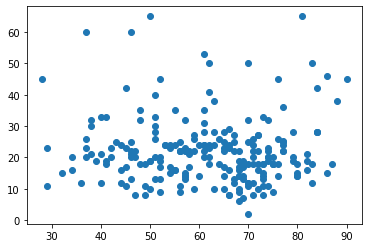

In [7]:
### plot 2 attributes to visualize the possible clusters:

plt.scatter(cl_encoded['AgeAtDiagnosis'], cl_encoded['TumorSize'])

In [8]:
## Features
features= cl_encoded.drop(["sampleID", "p53mutant"], axis=1)
target = cl_encoded["p53mutant"]

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

In [9]:
## K means clustering

km = KMeans(n_clusters = 2)
y_pred = km.fit_predict(features_std)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1])

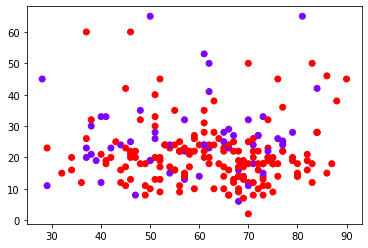

In [10]:
plt.scatter(cl_encoded['AgeAtDiagnosis'], cl_encoded['TumorSize'], c=km.labels_, 
cmap='rainbow') 

In [11]:
## Hierarchical Merging
hr = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hr_pred = hr.fit_predict(features_std)

# Show cluster membership
hr_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1], dtype=int64)

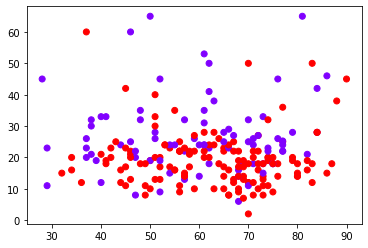

In [12]:
plt.scatter(cl_encoded['AgeAtDiagnosis'], cl_encoded['TumorSize'], c=hr.labels_, 
cmap='rainbow') 

In [13]:
kmeans_ac = print('Accuracy = ', accuracy_score(target, y_pred))
hier_ac = print('Accuracy = ', accuracy_score(target, hr_pred))                           

Accuracy =  0.8063063063063063
Accuracy =  0.7567567567567568


In [14]:
## PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
pc = pca.fit_transform(features_std)

In [15]:
km1 = KMeans(n_clusters = 2)
y1_pred = km1.fit_predict(pc)
y1_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1])

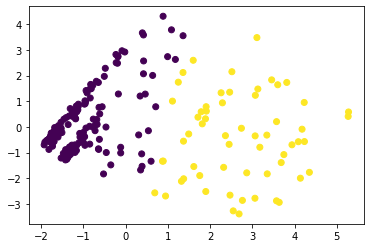

In [16]:
PCA_components = pd.DataFrame(pc)
km1.fit(PCA_components.iloc[:,:2])

labels = km1.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [17]:
hr1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hr1_pred = hr1.fit_predict(pc)

# Show cluster membership
hr1_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1], dtype=int64)

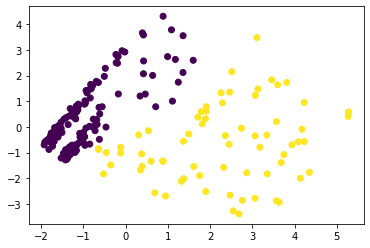

In [18]:
hr1.fit(PCA_components.iloc[:,:2])

labels = hr1.fit_predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [19]:
km1_ac = print('Accuracy = ', accuracy_score(target, y1_pred))
hr1_ac = print('Accuracy = ', accuracy_score(target, hr1_pred)) 

Accuracy =  0.8018018018018018
Accuracy =  0.7567567567567568
